In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd

path = '/content/sample_data/customer_shopping_data.csv'
df = pd.read_csv(path)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


--- Step 1: Loading and Cleaning ---
Missing values count:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
Number of duplicate rows: 0
Data types after cleaning:
 invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
month_year                object
dtype: object
------------------------------
--- Step 2: Descriptive Statistics ---
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.00000

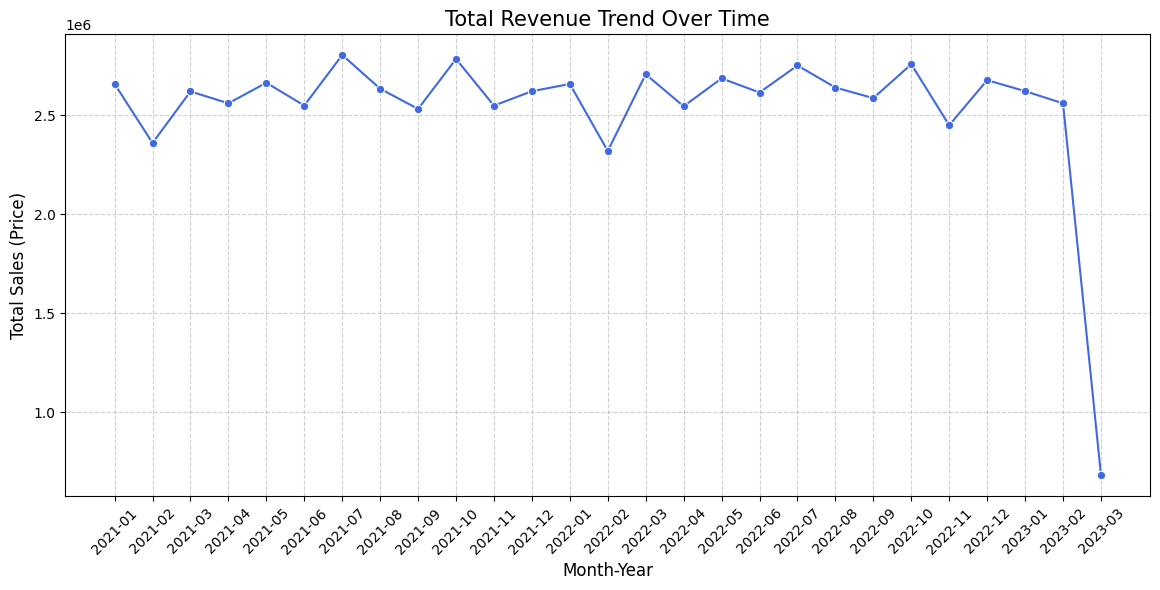

/tmp/ipython-input-2193942625.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='price', y='category', palette='viridis')


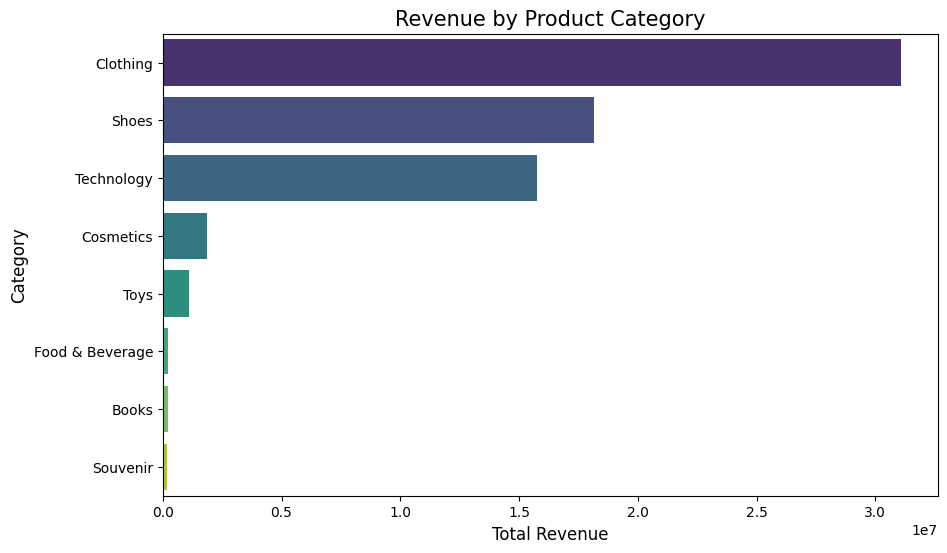

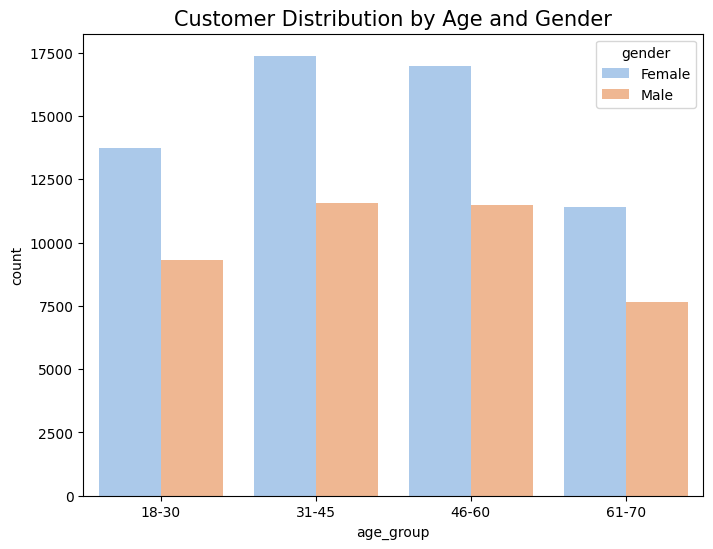

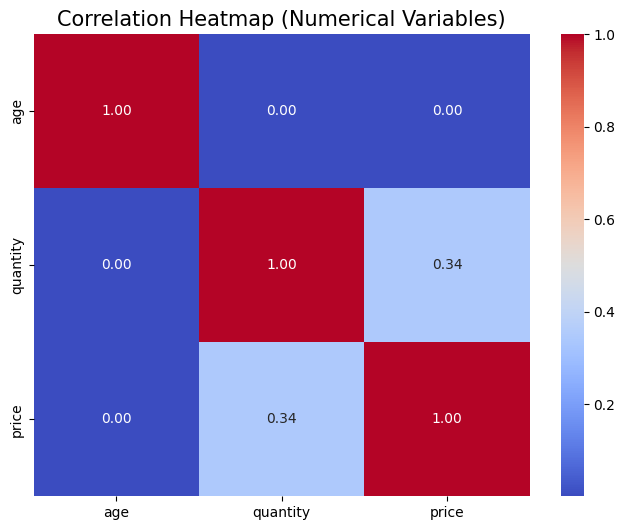

EDA Analysis Complete!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("--- Step 1: Loading and Cleaning ---")
df = pd.read_csv('/content/sample_data/customer_shopping_data.csv')

print("Missing values count:\n", df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df['month_year'] = df['invoice_date'].dt.to_period('M').astype(str)

print("Data types after cleaning:\n", df.dtypes)
print("-" * 30)


print("--- Step 2: Descriptive Statistics ---")
stats = df[['age', 'quantity', 'price']].describe()
print(stats)

mode_vals = df[['age', 'quantity', 'price']].mode().iloc[0]
print("\nMode of Age:", mode_vals['age'])
print("Mode of Quantity:", mode_vals['quantity'])
print("-" * 30)


print("--- Step 3: Generating Visualizations ---")
monthly_sales = df.groupby('month_year')['price'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='price', marker='o', color='royalblue')
plt.title('Total Revenue Trend Over Time', fontsize=15)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales (Price)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


plt.figure(figsize=(10, 6))
category_sales = df.groupby('category')['price'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_sales, x='price', y='category', palette='viridis')
plt.title('Revenue by Product Category', fontsize=15)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

bins = [18, 30, 45, 60, 70]
labels = ['18-30', '31-45', '46-60', '61-70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', hue='gender', palette='pastel')
plt.title('Customer Distribution by Age and Gender', fontsize=15)
plt.show()


plt.figure(figsize=(8, 6))
correlation_matrix = df[['age', 'quantity', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)', fontsize=15)
plt.show()

print("EDA Analysis Complete!")